1. 导入第三方库及数据、观察数据、修改数据类型

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [1]:
columns = ['user_id', "order_dt", 'order_products', 'order_amount']
df = pd.read_table(r'Desktop/AnaysisCaseSample/Sample.txt', names=columns, sep='\s+')

NameError: name 'pd' is not defined

In [3]:
df.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [4]:
df.describe()

,user_id,order_dt,order_products,order_amount
count,69325.000000,6.932500e+04,69325.000000,69325.000000
mean,11412.889189,1.997228e+07,2.409362,35.888045
std,6784.866631,3.838350e+03,2.319827,36.124343
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5477.000000,1.997022e+07,1.000000,14.490000
50%,11349.000000,1.997042e+07,2.000000,25.980000
75%,17174.000000,1.997111e+07,3.000000,43.700000
max,23439.000000,1.998063e+07,99.000000,1286.010000


1. 其中用户数有60659，平均每笔订单中有2.4个产品，最少的订单中有1个产品，最多有99个产品，存在一定的极值干扰；

2. 其中每笔订单平均消费35元左右，而最小的消费额为0，最大的则为1286，也存在一定的极值干扰；

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69325 entries, 0 to 69324
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         69325 non-null  int64  
 1   order_dt        69325 non-null  int64  
 2   order_products  69325 non-null  int64  
 3   order_amount    69325 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


* 从表格的各项属性信息中可以看到，订单日期的格式为数字模式，需要更正
* “to_datetime()”

In [6]:
df['order_dt'] = pd.to_datetime(df.order_dt, format='%Y%m%d')
df['month'] = df.order_dt.values.astype('datetime64[M]')
df['day'] = df.order_dt.values.astype('datetime64[D]')
df.head()

,user_id,order_dt,order_products,order_amount,month,day
0,1,1997-01-01,1,11.77,1997-01-01,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01,1997-01-12
2,2,1997-01-12,5,77.00,1997-01-01,1997-01-12
3,3,1997-01-02,2,20.76,1997-01-01,1997-01-02
4,3,1997-03-30,2,20.76,1997-03-01,1997-03-30


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69325 entries, 0 to 69324
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         69325 non-null  int64         
 1   order_dt        69325 non-null  datetime64[ns]
 2   order_products  69325 non-null  int64         
 3   order_amount    69325 non-null  float64       
 4   month           69325 non-null  datetime64[ns]
 5   day             69325 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(2)
memory usage: 3.2 MB


# 用户消费的趋势分析

### 1.每月的消费总金额及其变化趋势
### 2.每月的消费次数及其变化趋势
### 3.每月的消费人数
### 4.每月用户平均消费金额的趋势
### 5.每月用户平均消费次数的趋势


##  1.每月的消费总金额及其变化趋势



思路：设置图标格式 -> 对月份进行分组 -> 对每个月的消费金额求和 -> 制图

<AxesSubplot:xlabel='month'>

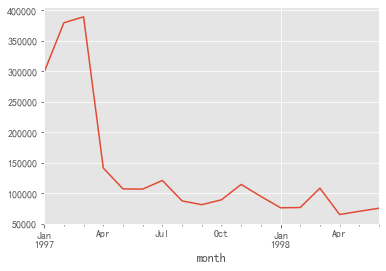

In [8]:
plt.style.use('ggplot')
df.groupby('month')["order_amount"].sum().plot()

小结：
* 由消费金额的变化趋势可得：97年前3个月消费金额逐渐上升达到高峰，但三月份后出现断崖式下跌，并随后的连续月份中呈现出逐渐下降的趋势；
* 可见在1997年3月份，可能出现营销方面的危机或者与产品的淡旺季的交替有所相关。



* 每月的消费次数及其变化趋势

思路：对月份进行分组 -> 求得每个月进行消费的用户总数 -> 制图

<AxesSubplot:xlabel='month'>

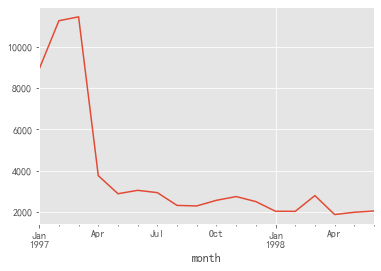

In [9]:
df.groupby("month").user_id.count().plot()

* 通过对每月的消费次数的变化趋势的体现来看，也表现出前3个月逐渐攀升至顶峰最后出现断崖式下跌并持续缓慢下降的趋势；
* 说明用户对于该产品的消费意愿在下降，亦有可能是该产品曝光率突然下跌，导致客户很难再更好的了解到产品信息，从而出现消费次数下跌的情况等

* 每月的消费人数

思路：对月份进行分组 -> 运用匿名函数对用户id去重并计算个数 -> 制图 

<AxesSubplot:ylabel='user_id'>

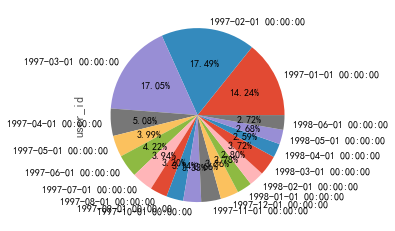

In [10]:
df.groupby('month').user_id.apply(lambda x: len(x.drop_duplicates())).plot.pie(autopct='%.2f%%')
#user_id_unique = df.groupby("month").user_id.nunique()

## * 每月用户平均消费金额的趋势

* 制作数据透视表

In [11]:
pd.pivot_table(df,index=["month"], 
               values = ['order_amount', 'order_products', 'user_id'],
               aggfunc={'order_amount':'sum',
                       'order_products':'sum',
                       'user_id':'count'})

,order_amount,order_products,user_id
month,,,
1997-01-01,299060.17,19416,8928
1997-02-01,379590.03,24921,11272
1997-03-01,389260.84,25898,11460
1997-04-01,141627.60,9644,3752
1997-05-01,107433.02,7238,2874
1997-06-01,107064.05,7206,3039
1997-07-01,121215.42,8074,2927
1997-08-01,87764.79,5815,2307
1997-09-01,81547.95,5699,2282


思路：对‘月份’和‘用户id’进行分组求和 -> 去掉表中的索引打平-> 再按月份进行分组 -> 对每月的消费金额求平均-> 制图

<AxesSubplot:xlabel='month'>

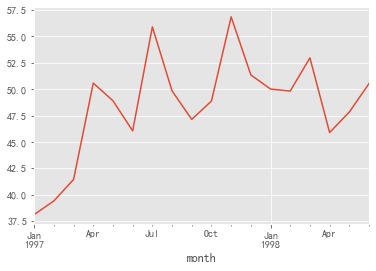

In [12]:
temp = df.groupby(['month','user_id']).sum()
temp.groupby('month')['order_amount'].mean().plot()

## 每月用户平均消费次数的趋势

* 思路：对‘月份’和‘用户id’进行分组计数 -> 去除索引打平 并将其命名为‘user_c’的表 -> 在‘user_c’表中添加一列‘count'，让这一列的值等于‘order_products’ -> 在‘user_c’表中对月份进行分组并对‘count’求平均值 -> 制图

<AxesSubplot:xlabel='month'>

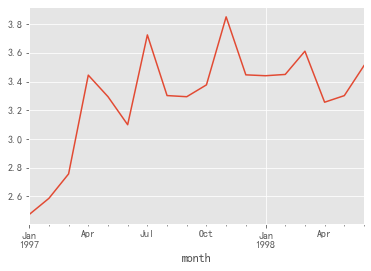

In [13]:
user_c = df.groupby(['month','user_id']).sum().reset_index()
user_c['count'] = user_c['order_products']
user_c.loc[:,['month','user_id','count']].groupby('month')['count'].mean().plot()

### 综合用户每月消费金额的数据透视表、平均消费金额、平均消费次数的图标信息可知。前三个月的用户流量较高，消费的总商品数也较多，自然总体的消费金额也是相对较高，但平均到这么大的用户流量上的时候，平均消费金额及平均消费次数自然也会相对较低，说不定这其中还包含有只消费一次后续都不再消费，而且消费金额较低的用户，这也将大大拉低平均值。但是从平均消费金额及平均消费次数的趋势图上可以看到，随着前三个月的上涨趋势后是区域稳定的震荡阶段，结合数据透视表可以了解到，后续的月份的用户流量及消费总金额较稳定，这其中可能存在忠实用户的贡献也免不了会有老客户的流失的现象。
## 因此，若每个月想争取有更高的消费金额
## 应积极引流，增大用户流量，加大营销力度，促进用户多消费。

# 用户个体消费分析

### 1.用户消费金额、消费次数的描述统计
### 2.用户消费金额的分布图
### 3.用户消费的商品数的分布图
### 4.用户消费金额和商品数的散点图

1. 用户消费金额、消费次数的描述统计

In [25]:
df.groupby('user_id').sum().describe()

,order_products,order_amount
count,23439.000000,23439.000000
mean,7.126115,106.145258
std,17.005389,241.206383
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.440000
75%,7.000000,106.500000
max,1033.000000,13990.930000


* 由上述表格可知，(order_products) 所有订单的商品总数是23439，而其中每个用户平均消费的商品数是7笔左右，有75%的用户购买商品数小于7件，然而所有用户中购买到的商品数的最小值是1，最大值是1033，中位数是3，这些数据里面肯定存在一定的极值干扰；
* (order_amount) 所有订单的商品金额总数：也同上

2.用户消费金额的分布图
* 思路：对用户id进行分组求和 -> 对‘order_amount’列中小于1200的值进行制图

<AxesSubplot:ylabel='Frequency'>

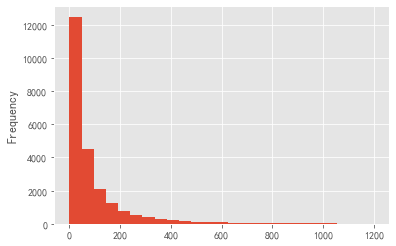

In [32]:
df.groupby('user_id').sum().query('order_amount < 1200').order_amount.plot.hist(bins=25)

* 思路：对用户id进行分组求和 -> 对‘order_products’列中小于60的值进行制图

<AxesSubplot:ylabel='Frequency'>

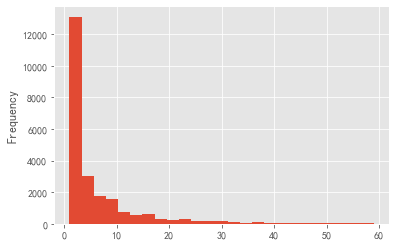

In [40]:
df.groupby("user_id").sum().query('order_products < 60').order_products.plot.hist(bins=25)

3. 用户消费金额和商品数的散点图
* 思路：对用户id进行分组 -> 以‘order_amount’为y轴，‘order_products'为x轴 -> 制图

<AxesSubplot:xlabel='order_products', ylabel='order_amount'>

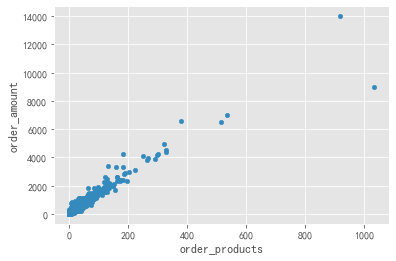

In [42]:
df.groupby('user_id').sum().plot.scatter(y='order_amount', x = 'order_products')

* 因为有异常值的存在，需要去除：尝试限制用户金额总数小于6000

<AxesSubplot:xlabel='order_products', ylabel='order_amount'>

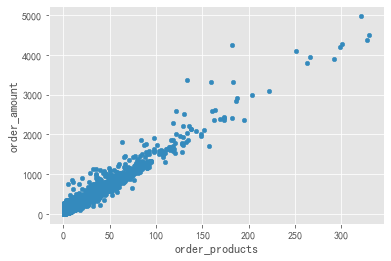

In [44]:
df.groupby('user_id').sum().query('order_amount < 6000').plot.scatter(x='order_products', y='order_amount')

* 由‘用户消费金额的分布图’及‘用户消费商品数的分布图’可得：大部分用户消费的金额在0-200范围之间，消费的商品数在0-10之间，除个别大客户的高消费外，吸引、加大一般客户的消费意愿以及满意度是至关重要的。大客户可以通过专项服务来维持。
* 由‘消费金额与商品数的散点图’可得：去除个别异常值后，商品购买数量和消费金额是正相关的，同时大量的商品数及金额分布在“一般用户的这个范围内”；

小结：用户的引流是促进经营、增加营收的重中之重！